<a href="https://colab.research.google.com/github/AdityaJ9082/NLP/blob/main/seq2seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Model
from keras.layers import Dense,LSTM,Embedding,Input
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam,SGD

In [ ]:
BATCH_SIZE = 64  # Batch size for training.
EPOCHS = 40  # Number of epochs to train for.
LATENT_DIM = 256  # Latent dimensionality of the encoding space.
NUM_SAMPLES = 10000  # Number of samples to train on.
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 100


In [ ]:
input_texts=[]
target_texts=[]
target_text_inputs=[]

In [ ]:
t=0
for line in open('/content/spa.txt'):
  # print(line)
  line=line.split('\t')
  line='\t'.join(line[:2])
  # print(line)
  # print(line)
  t+=1
  if t>NUM_SAMPLES:
    break
  if '\t' not in line:
    continue
  input_text,translation=line.split('\t')
  target_text=translation+'<eos>'
  target_text_input='<sos>'+translation
  input_texts.append(input_text)
  target_texts.append(target_text)
  target_text_inputs.append(target_text_input)



In [ ]:
print("Number of samples:",len(input_texts))

Number of samples: 10000


In [ ]:
tokenizer_inputs=Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer_inputs.fit_on_texts(input_texts)
input_sequences=tokenizer_inputs.texts_to_sequences(input_texts)

In [ ]:
input_sequences

[[15],
 [15],
 [15],
 [15],
 [257],
 [127],
 [127],
 [127],
 [127],
 [127],
 [127],
 [127],
 [40],
 [1423],
 [1014],
 [367],
 [367],
 [367],
 [45],
 [45],
 [45],
 [390],
 [480],
 [480],
 [480],
 [65],
 [56],
 [56],
 [56],
 [72],
 [72],
 [72],
 [72],
 [72],
 [72],
 [368],
 [14, 4],
 [15, 28],
 [15, 28],
 [481],
 [481],
 [212],
 [212],
 [212],
 [1, 536],
 [1, 536],
 [1, 536],
 [1, 536],
 [1, 258],
 [1, 258],
 [1, 47],
 [1, 146],
 [1, 146],
 [694, 71],
 [601],
 [601],
 [259],
 [259],
 [259],
 [259],
 [259],
 [259],
 [259],
 [482],
 [391],
 [483],
 [483],
 [483],
 [483],
 [483],
 [226, 4],
 [226, 4],
 [87, 4],
 [87, 4],
 [87, 4],
 [87, 4],
 [1424],
 [39, 30],
 [15, 43],
 [15, 43],
 [15, 43],
 [15, 43],
 [15, 43],
 [15, 43],
 [15, 43],
 [15, 43],
 [57, 4],
 [57, 4],
 [57, 4],
 [9, 258],
 [9, 258],
 [1425, 36],
 [537, 8],
 [1, 338],
 [1, 287],
 [1, 695],
 [1, 695],
 [1, 695],
 [1, 695],
 [1, 41],
 [1, 41],
 [1, 160],
 [1, 303],
 [1, 92],
 [1, 484],
 [1, 227],
 [1, 227],
 [1, 227],
 [1, 538],

In [ ]:


tokenizer_inputs

In [ ]:
word2_idx=tokenizer_inputs.word_index

In [ ]:
word2_idx

{'i': 1,
 'tom': 2,
 'you': 3,
 'it': 4,
 'is': 5,
 'a': 6,
 "i'm": 7,
 'me': 8,
 'he': 9,
 'we': 10,
 'this': 11,
 "it's": 12,
 'are': 13,
 'do': 14,
 'go': 15,
 "don't": 16,
 'was': 17,
 'can': 18,
 'that': 19,
 'they': 20,
 'my': 21,
 "you're": 22,
 'the': 23,
 'be': 24,
 'come': 25,
 'here': 26,
 'to': 27,
 'on': 28,
 'have': 29,
 'up': 30,
 'not': 31,
 'she': 32,
 "we're": 33,
 'like': 34,
 'him': 35,
 'in': 36,
 "that's": 37,
 "i'll": 38,
 'get': 39,
 'who': 40,
 'know': 41,
 "they're": 42,
 'now': 43,
 'love': 44,
 'help': 45,
 'did': 46,
 'try': 47,
 'am': 48,
 'what': 49,
 'look': 50,
 'need': 51,
 "tom's": 52,
 'how': 53,
 'us': 54,
 'see': 55,
 'stop': 56,
 'got': 57,
 'want': 58,
 "let's": 59,
 'home': 60,
 'keep': 61,
 "he's": 62,
 'let': 63,
 "can't": 64,
 'stay': 65,
 'out': 66,
 'hate': 67,
 'your': 68,
 'take': 69,
 'good': 70,
 'no': 71,
 'wait': 72,
 'saw': 73,
 'may': 74,
 'feel': 75,
 'please': 76,
 'back': 77,
 'there': 78,
 'leave': 79,
 'one': 80,
 'give': 81,
 

In [ ]:
len(word2_idx)

2274

In [ ]:
max_len_input=max(len(s) for s in input_sequences)

In [ ]:
max_len_input

5

In [ ]:
tokenizer_op=Tokenizer(num_words=MAX_NUM_WORDS,filters='')
tokenizer_op.fit_on_texts(target_texts+target_text_inputs)
target_sequences=tokenizer_op.texts_to_sequences(target_texts)
target_sequences_inputs=tokenizer_op.texts_to_sequences(target_text_inputs)

In [ ]:
target_sequences

[[2786],
 [1984],
 [2787],
 [1985],
 [1456],
 [5136],
 [5137],
 [2788],
 [5138],
 [5139],
 [5140],
 [5141],
 [5142],
 [565],
 [5143],
 [1986],
 [5144],
 [1987],
 [5145],
 [5146, 2789],
 [2789],
 [2790],
 [5147],
 [2791],
 [5148],
 [2792],
 [5149],
 [5150],
 [5151],
 [2793],
 [5152],
 [5153],
 [5154],
 [994],
 [2794],
 [1988],
 [5155],
 [1457],
 [5156],
 [1456],
 [1456],
 [2795, 1989],
 [5157, 1989],
 [5158, 1458],
 [7, 5159],
 [7, 5160],
 [7, 5161],
 [7, 5162],
 [5163],
 [2796],
 [9, 2797],
 [1459, 1460],
 [1459, 1461, 1990],
 [5164, 5165],
 [2798, 48, 2799],
 [1462],
 [1986],
 [1987],
 [5166],
 [5167],
 [5168],
 [5169],
 [5170],
 [2800],
 [5171],
 [1991, 5172],
 [5173],
 [5174],
 [5175],
 [5176],
 [5177],
 [5178],
 [5179],
 [5180],
 [5181],
 [5182],
 [5183],
 [5184],
 [105, 89, 378],
 [1463, 89, 378],
 [511, 89, 378],
 [1992, 89, 378],
 [105, 379],
 [1463, 379],
 [511, 379],
 [1992, 379],
 [1204, 5185],
 [170, 5186],
 [5187],
 [24, 1205],
 [1205],
 [1993, 566],
 [5188],
 [7, 2801],
 [

In [ ]:
target_sequences_inputs

[[8540],
 [8541],
 [8542],
 [4183],
 [2393],
 [8543],
 [8544],
 [4184],
 [8545],
 [8546],
 [8547],
 [8548],
 [8549],
 [614],
 [8550],
 [4185],
 [8551],
 [2394],
 [8552],
 [8553, 8554],
 [8555],
 [8556],
 [8557],
 [4186],
 [8558],
 [8559],
 [8560],
 [8561],
 [8562],
 [4187],
 [8563],
 [8564],
 [8565],
 [1337],
 [4188],
 [4189],
 [8566],
 [4190],
 [8567],
 [2393],
 [2393],
 [4191, 2395],
 [8568, 2395],
 [8569, 1770],
 [16, 8570],
 [16, 8571],
 [16, 8572],
 [16, 8573],
 [8574],
 [8575],
 [37, 4192],
 [1771, 1772],
 [1771, 1461, 2396],
 [8576, 8577],
 [4193, 48, 4194],
 [8578],
 [4185],
 [2394],
 [8579],
 [8580],
 [8581],
 [8582],
 [8583],
 [4195],
 [8584],
 [2397, 8585],
 [8586],
 [8587],
 [8588],
 [8589],
 [8590],
 [8591],
 [8592],
 [8593],
 [8594],
 [8595],
 [8596],
 [8597],
 [195, 89, 394],
 [1773, 89, 394],
 [924, 89, 394],
 [2398, 89, 394],
 [195, 395],
 [1773, 395],
 [924, 395],
 [2398, 395],
 [1338, 8598],
 [173, 8599],
 [8600],
 [26, 1774],
 [8601],
 [2399, 615],
 [8602],
 [16, 41

In [ ]:
word2idx_outputs=tokenizer_op.word_index

In [ ]:
word2idx_outputs

{'es': 1,
 'a': 2,
 'tom': 3,
 'un': 4,
 'no': 5,
 '<sos>tom': 6,
 'me': 7,
 'está': 8,
 'lo': 9,
 'la': 10,
 'de': 11,
 'el': 12,
 '<sos>no': 13,
 'se': 14,
 'estoy': 15,
 '<sos>me': 16,
 'yo': 17,
 'en': 18,
 '<sos>yo': 19,
 'una': 20,
 'que': 21,
 'soy': 22,
 'te': 23,
 'él': 24,
 'mi': 25,
 '<sos>él': 26,
 'los': 27,
 '<sos>estoy': 28,
 '<sos>es': 29,
 'tom.<eos>': 30,
 'tom.': 31,
 'por': 32,
 'gusta': 33,
 'le': 34,
 '<sos>soy': 35,
 'puedo': 36,
 '<sos>lo': 37,
 '¿quién': 38,
 '<sos>¿quién': 39,
 'son': 40,
 'tengo': 41,
 'las': 42,
 'estaba': 43,
 'eso': 44,
 'ella': 45,
 'tiene': 46,
 'nos': 47,
 'con': 48,
 '<sos>ella': 49,
 'están': 50,
 'muy': 51,
 'esto': 52,
 'fue': 53,
 'esto.<eos>': 54,
 'esto.': 55,
 'puede': 56,
 '<sos>eso': 57,
 'era': 58,
 'aquí.<eos>': 59,
 'aquí.': 60,
 'tan': 61,
 '<sos>se': 62,
 '<sos>esto': 63,
 'ha': 64,
 'estamos': 65,
 'siento': 66,
 '<sos>te': 67,
 '¿qué': 68,
 'bien.<eos>': 69,
 'bien.': 70,
 'he': 71,
 '¡qué': 72,
 '<sos>tengo': 73,
 '<so

In [ ]:
max_len_target=max(len(s) for s in target_sequences)

In [ ]:
max_len_target

9

In [ ]:
encoder_inputs=pad_sequences(input_sequences,maxlen=max_len_input)
print(encoder_inputs.shape)
print(encoder_inputs[0])

(10000, 5)
[ 0  0  0  0 15]


In [ ]:
decoder_inputs=pad_sequences(target_sequences_inputs,maxlen=max_len_target,padding='post')
print(decoder_inputs.shape)
print(decoder_inputs[0])

(10000, 9)
[8540    0    0    0    0    0    0    0    0]


In [ ]:
decoder_targets=pad_sequences(target_sequences,maxlen=max_len_target,padding='post')

In [ ]:
decoder_targets

array([[2786,    0,    0, ...,    0,    0,    0],
       [1984,    0,    0, ...,    0,    0,    0],
       [2787,    0,    0, ...,    0,    0,    0],
       ...,
       [ 102,   27, 8538, ...,    0,    0,    0],
       [ 102,    2,   27, ...,    0,    0,    0],
       [ 102, 2357,    0, ...,    0,    0,    0]], dtype=int32)

In [ ]:
num_words=min(MAX_NUM_WORDS,len(word2_idx)+1)

In [ ]:
embedding_layer=Embedding(num_words,EMBEDDING_DIM,input_length=max_len_input)


In [ ]:
num_words_output = len(word2idx_outputs) + 1

In [ ]:
decoder_targets_one_hot=np.zeros((len(input_texts),max_len_target,num_words_output),dtype='float32')#for each input we have aout put having max_len_target words
#where each word have num_words_output possibility

In [ ]:
for i, d in enumerate(decoder_targets):
  for t, word in enumerate(d):
    # if word != 0:
    decoder_targets_one_hot[i, t, word] = 1#[2786,    0,    0, ...,    0,    0,    0]->i 2786's index=0->t 2786->word
#so output will be having arrays having 2786 marked 1 ,0 marked 1,........

In [ ]:
decoder_targets_one_hot

array([[[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [ ]:
encoder_inputs_placeholder=Input(shape=(max_len_input,))
x=embedding_layer(encoder_inputs_placeholder)
encoder=LSTM(LATENT_DIM,return_state=True,dropout=0.5)
encoder_outputs,h,c=encoder(x)
encoder_states=[h,c]

decoder_inputs_placeholder=Input(shape=(max_len_target,))
decoder_embedding=Embedding(num_words_output,LATENT_DIM)
decoder_inputs_x=decoder_embedding(decoder_inputs_placeholder)
decoder_lstm=LSTM(LATENT_DIM,return_sequences=True,return_state=True,dropout=0.5)
decoder_outputs,_,_=decoder_lstm(decoder_inputs_x,initial_state=encoder_states)
decoder_dense=Dense(num_words_output,activation='softmax')
decoder_outputs=decoder_dense(decoder_outputs)


In [ ]:
model=Model([encoder_inputs_placeholder,decoder_inputs_placeholder],decoder_outputs)

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
r=model.fit([encoder_inputs,decoder_inputs],decoder_targets_one_hot,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_split=0.2)

Epoch 1/40
125/125 [==============================] - 22s 99ms/step - loss: 3.1055 - accuracy: 0.6996 - val_loss: 2.6370 - val_accuracy: 0.6533
Epoch 2/40
125/125 [==============================] - 6s 50ms/step - loss: 2.1282 - accuracy: 0.7153 - val_loss: 2.4850 - val_accuracy: 0.6770
Epoch 3/40
125/125 [==============================] - 5s 43ms/step - loss: 2.0284 - accuracy: 0.7215 - val_loss: 2.4042 - val_accuracy: 0.6779
Epoch 4/40
125/125 [==============================] - 6s 49ms/step - loss: 1.9338 - accuracy: 0.7295 - val_loss: 2.3146 - val_accuracy: 0.6706
Epoch 5/40
125/125 [==============================] - 6s 46ms/step - loss: 1.8512 - accuracy: 0.7372 - val_loss: 2.2418 - val_accuracy: 0.6962
Epoch 6/40
125/125 [==============================] - 6s 51ms/step - loss: 1.7829 - accuracy: 0.7446 - val_loss: 2.1701 - val_accuracy: 0.7107
Epoch 7/40
125/125 [==============================] - 5s 42ms/step - loss: 1.7216 - accuracy: 0.7562 - val_loss: 2.1134 - val_accuracy: 0.719

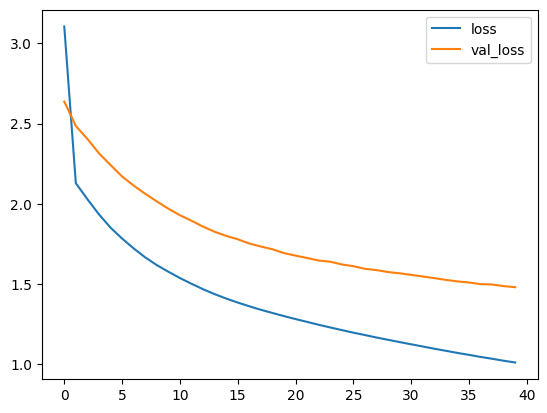

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

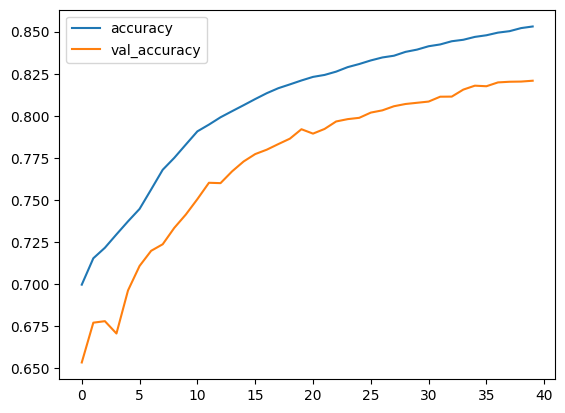

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
encoder_inputs_placeholder=Input(shape=(max_len_input,))
x=embedding_layer(encoder_inputs_placeholder)
encoder=LSTM(LATENT_DIM,return_state=True,dropout=0.5)
encoder_outputs,h,c=encoder(x)
encoder_states=[h,c]

decoder_inputs_placeholder=Input(shape=(max_len_target,))
decoder_embedding=Embedding(num_words_output,LATENT_DIM)
decoder_inputs_x=decoder_embedding(decoder_inputs_placeholder)
decoder_lstm=LSTM(LATENT_DIM,return_sequences=True,return_state=True,dropout=0.5)
decoder_outputs,_,_=decoder_lstm(decoder_inputs_x,initial_state=encoder_states)
decoder_dense=Dense(num_words_output,activation='softmax')
decoder_outputs=decoder_dense(decoder_outputs)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 5)]                  0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 9)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 5, 100)               227500    ['input_5[0][0]']             
                                                                                                  
 embedding_3 (Embedding)     (None, 9, 256)               3111680   ['input_6[0][0]']             
                                                                                              

In [ ]:
encoder_model=Model(encoder_inputs_placeholder,encoder_states)
decoder_h=Input(shape=(LATENT_DIM,))
decoder_c=Input(shape=(LATENT_DIM,))
decoder_input_states=[decoder_h,decoder_c]


decoder_input=Input(shape=(1,))
decoder_emb=decoder_embedding(decoder_input)
decoder_outputs,h,c=decoder_lstm(decoder_emb,initial_state=decoder_input_states)
decoder_states=[h,c]
decoder_output=decoder_dense(decoder_outputs)
decoder_model=Model([decoder_input]+decoder_input_states,[decoder_outputs]+decoder_states)

NameError: ignored